# Relation between stock price and volume

The data includes daily close/open/high/low price and volume. Let's see first how data looks like.

I'll follow these steps:
1. load data into dataframe
2. data wrangling & plot
3. fit model
4. evaluate result

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# historical daily Stock price Data downloaded from yahoo.com/finance
# choose 2 big companies randomly.
# read .csv files into data frame

amd = pd.read_csv('../Downloads/AMD.csv')
google = pd.read_csv('../Downloads/GOOGL.csv')

IOError: File ../Downloads/AMD.csv does not exist

In [3]:
# 2009-05-23 ~ 2017-05-03
# have 2001 rows and 7 columns

amd.head()
#amd.info()
#amd.shape
#amd.describe

,Date,Open,High,Low,Close,Volume,Adj Close
0,2017-05-03,10.29,10.68,9.85,10.39,140899400,10.39
1,2017-05-02,11.73,11.76,10.30,10.32,266683200,10.32
2,2017-05-01,13.43,13.63,13.25,13.62,57267000,13.62
3,2017-04-28,13.73,13.76,13.16,13.30,50144600,13.30
4,2017-04-27,13.43,13.70,13.37,13.62,31013900,13.62


## Data Wrangling & plotting

In [4]:
# drop high, low, close columns, and change name of Adj Close to Close.

amd.drop(['High','Low','Close'], axis=1, inplace=True)
amd.rename(columns={'Adj Close' : 'Close'}, inplace=True)

google.drop(['High', 'Low', 'Close'], axis=1, inplace=True)
google.rename(columns={'Adj Close' : 'Close'}, inplace=True)

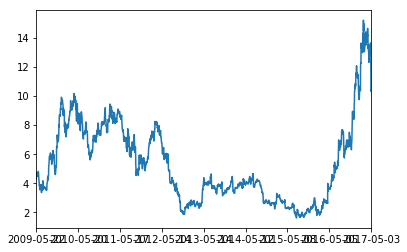

In [5]:
# reverse row order because as you can see above data, it starts from recent date. 
amd = amd.iloc[::-1]

# use Date column as index and delete index name.
amd.set_index(['Date'], inplace=True)
amd.index.name=None

# plot
amd['Close'].plot()
plt.show()

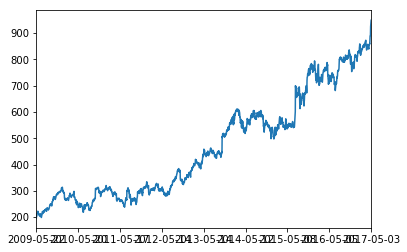

In [6]:
# reverse row order 
google = google.iloc[::-1]

google.set_index(['Date'], inplace=True)
google.index.name=None

google['Close'].plot()
plt.show()


In [8]:
# make new columns; returns and log_returns

import math

amd['returns'] = amd['Close'] / amd['Open']
# amd['log_returns'] = amd['returns'].apply(lambda x: math.log10(x))


google['returns'] = google['Close'] / google['Open']
# google['log_returns'] = google['returns'].apply(lambda x: math.log10(x))


amd = amd[['Open', 'Close', 'Volume', 'returns',]]
google = google[['Open', 'Close', 'Volume', 'returns']]

You may want to use log_returns instead of returns, if the case, use apply function.

In [9]:
# check what has changed; row order, columns
amd.head()

,Open,Close,Volume,returns
2009-05-22,4.43,4.26,8274300,0.961625
2009-05-26,4.26,4.53,16094300,1.063380
2009-05-27,4.57,4.71,21512600,1.030635
2009-05-28,4.75,4.70,18383900,0.989474
2009-05-29,4.71,4.54,24539700,0.963907


I'd like to figure out relationship between daily returns and volume.

Set volume as independent variable(X), return as dependent variable(y).

X_train should be convert into numpy array.

In [10]:
# to compare daily change of price with daily volume change use zip func.
# change = today volume / yesterday volume
# to calculate change, we need to transfer data type of Volume into float.
amd.Volume = amd.Volume.astype(float)
change = []
for a, b in zip(amd.Volume, amd.Volume[1:]):
    x = b/a
    change.append(x)

/Users/genius_hee/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [11]:
google.Volume = google.Volume.astype(float)
change_gl = []
for a, b in zip(google.Volume, google.Volume[1:]):
    x = b/a
    change_gl.append(x)

In [12]:
# changed
len(change)

2000

In [13]:
# we will use 2000 data, so delete oldest data row 
# because we can't calculate volume change in 2009-05-22. we don't volume data on 2009-05-21.
amd.drop(amd.index[0], inplace=True)
#amd.head()

google.drop(google.index[0], inplace=True)
google.head()

,Open,Close,Volume,returns
2009-05-26,391.950009,202.382388,6202700.0,0.516347
2009-05-27,405.640010,202.982989,6062500.0,0.500402
2009-05-28,408.679997,205.405413,5332200.0,0.502607
2009-05-29,412.110005,208.823825,5291100.0,0.506719
2009-06-01,418.729996,213.493503,6638100.0,0.509860


Done!

In [14]:
# merge change into dataframe.
amd['vol_change'] = np.array(change)
google['vol_change'] = np.array(change_gl)

I found an error which is..

In [15]:
amd.describe()

,Open,Close,Volume,returns,vol_change
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,5.328640,5.326635,2.526422e+07,0.999819,inf
std,2.781387,2.781796,2.084619e+07,0.028920,NaN
min,1.620000,1.620000,0.000000e+00,0.858268,0.000000
25%,2.985000,2.995000,1.328370e+07,0.983522,0.749006
50%,4.300000,4.290000,1.981110e+07,0.998504,0.971195
75%,7.360000,7.342500,3.007502e+07,1.014892,1.291609
max,15.450000,15.200000,2.666832e+08,1.250784,inf


Do you see the table above which is short descriptive statistics of AMD.


something goes wrong with vol_change column. 

Let's find out.

In [16]:
# find if there is infinite value in dataframe
amd.loc[amd['vol_change']==np.inf]

,Open,Close,Volume,returns,vol_change
2015-01-05,2.67,2.66,8878200.0,0.996255,inf


There you go!

Let's check what's happening at 2015-01-05.

In [17]:
amd.loc['2015-01-05']

Open          2.670000e+00
Close         2.660000e+00
Volume        8.878200e+06
returns       9.962547e-01
vol_change             inf
Name: 2015-01-05, dtype: float64

vol_change has infinite value.

In [18]:
amd.loc['2014-12-28':'2015-01-06']

,Open,Close,Volume,returns,vol_change
2014-12-29,2.64,2.66,8527000.0,1.007576,2.116091
2014-12-30,2.64,2.63,7783700.0,0.996212,0.912830
2014-12-31,2.64,2.67,11177900.0,1.011364,1.436065
2015-01-02,2.67,2.67,0.0,1.000000,0.000000
2015-01-05,2.67,2.66,8878200.0,0.996255,inf
2015-01-06,2.65,2.63,13912500.0,0.992453,1.567041


I didn't expect this.

In [19]:
# to get vol_change value at 2015-01-05, use 2014-12-31 volume cause 2015-01-02 has zero volume.
amd['vol_change']['2015-01-05'] = amd['Volume']['2015-01-05'] / amd['Volume']['2014-12-31']
amd.loc['2015-01-05']

Open          2.670000e+00
Close         2.660000e+00
Volume        8.878200e+06
returns       9.962547e-01
vol_change    7.942637e-01
Name: 2015-01-05, dtype: float64

In [20]:
amd.loc['2014-12-28':'2015-01-06']

,Open,Close,Volume,returns,vol_change
2014-12-29,2.64,2.66,8527000.0,1.007576,2.116091
2014-12-30,2.64,2.63,7783700.0,0.996212,0.912830
2014-12-31,2.64,2.67,11177900.0,1.011364,1.436065
2015-01-02,2.67,2.67,0.0,1.000000,0.000000
2015-01-05,2.67,2.66,8878200.0,0.996255,0.794264
2015-01-06,2.65,2.63,13912500.0,0.992453,1.567041


It is fixed, now delete 2015-01-02 row.

In [21]:
amd.drop(['2015-01-02'], axis=0, inplace=True)
amd.shape

(1999, 5)

we lost one data, but it is OK, bacuase we're trying to figure out relationship between price & volume.

In [22]:
# amd.loc['2014-12-28':'2015-01-06']
amd.describe()

,Open,Close,Volume,returns,vol_change
count,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000
mean,5.329970,5.327964,2.527686e+07,0.999819,1.122103
std,2.781447,2.781857,2.084374e+07,0.028928,0.653999
min,1.620000,1.620000,2.606600e+06,0.858268,0.214008
25%,3.010000,3.000000,1.328750e+07,0.983505,0.749308
50%,4.300000,4.290000,1.981920e+07,0.998470,0.971165
75%,7.360000,7.345000,3.011415e+07,1.014903,1.291481
max,15.450000,15.200000,2.666832e+08,1.250784,10.264616


In [23]:
google.describe()

,Open,Close,Volume,returns,vol_change
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,669.140959,466.251818,4.089300e+06,0.694412,1.062356
std,164.962578,197.180031,2.841631e+06,0.243533,0.404848
min,391.950009,198.513522,5.206000e+05,0.460396,0.238485
25%,548.840002,291.795536,1.976875e+06,0.499380,0.806712
50%,611.525016,428.963964,3.713100e+06,0.504991,0.978468
75%,770.337494,593.177506,5.232550e+06,0.996768,1.225027
max,1226.800064,948.450000,2.961990e+07,1.035742,5.426504


Data is ready to fit linear regression.

## Fit Model

In [24]:
# divide data for cross validation.
from sklearn.model_selection import train_test_split

# select vol_change column as X, returns as y.
amd_X, amd_y = np.array(amd.iloc[:, 4]), np.array(amd.iloc[:,3])
# 80% of data for train, 20% for test
amd_X_train, amd_X_test, amd_y_train, amd_y_test = \
    train_test_split(amd_X, amd_y,  test_size=0.2, random_state=0)
amd_X_train, amd_X_test = amd_X_train.reshape(-1, 1), amd_X_test.reshape(-1, 1)
amd_y_train, amd_y_test = amd_y_train.reshape(-1, 1), amd_y_test.reshape(-1, 1)

gl_X, gl_y = np.array(google.iloc[:, 4]), np.array(google.iloc[:,3])
gl_X_train, gl_X_test, gl_y_train, gl_y_test = \
    train_test_split(gl_X, gl_y, test_size=0.2, random_state=0)
gl_X_train, gl_X_test = gl_X_train.reshape(-1, 1), gl_X_test.reshape(-1, 1)    
gl_y_train, gl_y_test = gl_y_train.reshape(-1, 1), gl_y_test.reshape(-1, 1)


In [25]:
from sklearn import linear_model

# fit linear model
regr1 = linear_model.LinearRegression()
amd_regr = regr1.fit(amd_X_train, amd_y_train)

In [26]:
regr2 = linear_model.LinearRegression()
gl_regr = regr2.fit(gl_X_train, gl_y_train)

In [27]:
print ("amd, coefficient: %.3f" %np.float(amd_regr.coef_))
print ("google, coefficient: %.3f" %np.float(gl_regr.coef_))

amd, coefficient: 0.007
google, coefficient: -0.005


In [28]:
print ("Mean squared error of amd: %.3f" %np.mean((amd_regr.predict(amd_X_test) - amd_y_test)**2))
print ("Mean squared error of google: %.3f" %np.mean((gl_regr.predict(gl_X_test) - gl_y_test)**2))

Mean squared error of amd: 0.001
Mean squared error of google: 0.059


In [29]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % amd_regr.score(amd_X_test, amd_y_test))
print('Variance score: %.3f' % gl_regr.score(gl_X_test, gl_y_test))


Variance score: 0.027
Variance score: 0.000


poor prediction :(

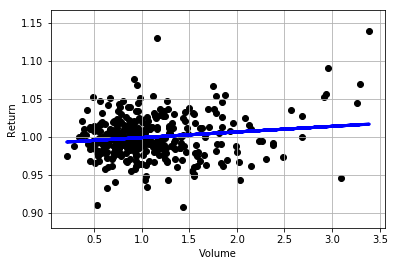

In [30]:
plt.scatter(amd_X_test, amd_y_test, color='black')
plt.plot(amd_X_test, amd_regr.predict(amd_X_test), color='blue', linewidth=3)
plt.xlabel('Volume')
plt.ylabel('Return')
plt.grid(True)

plt.show()


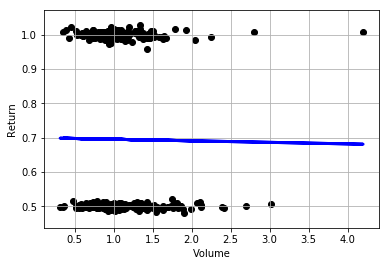

In [31]:
plt.scatter(gl_X_test, gl_y_test, color='black')
plt.plot(gl_X_test, gl_regr.predict(gl_X_test), color='blue', linewidth=3)
plt.xlabel('Volume')
plt.ylabel('Return')
plt.grid(True)

plt.show()


## Over all results, we can't find any significant relation between daily return rate and daily volume change rate.